In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [126]:
df = pd.read_csv('data.csv')

In [127]:
df.shape

(50, 2)

In [128]:
df.head()

,x,y
0,1.872701,6.945254
1,4.753572,58.855759
2,3.659970,18.851841
3,2.993292,8.470113
4,0.780093,6.301772


In [129]:
# separate the data into two axies
y_data = df['y']
x_data = df['x']

In [130]:
def fitting_function(w, x):
    return w * np.exp(x)

In [131]:
def average_square_loss(w):
    predictions = fitting_function(w, x_data)
    return np.mean((y_data - predictions) ** 2)

In [132]:
average_square_loss(0.2)

np.float64(174.17518033761135)

# part b

In [133]:
from scipy.optimize import minimize

In [134]:
result = minimize(
    average_square_loss,
    x0 = 0.2 # x0 is the initial guess for w. It is used to start the optimization process.
)

In [135]:
result
# the x is the optimal w that minimizes the average square loss

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 15.660434658432594
        x: [ 4.950e-01]
      nit: 1
      jac: [ 2.348e-05]
 hess_inv: [[ 2.744e-04]]
     nfev: 77
     njev: 33

In [136]:
best_average_square_loss = average_square_loss(4.950e-01)
best_average_square_loss

np.float64(15.660436500668782)

# part c

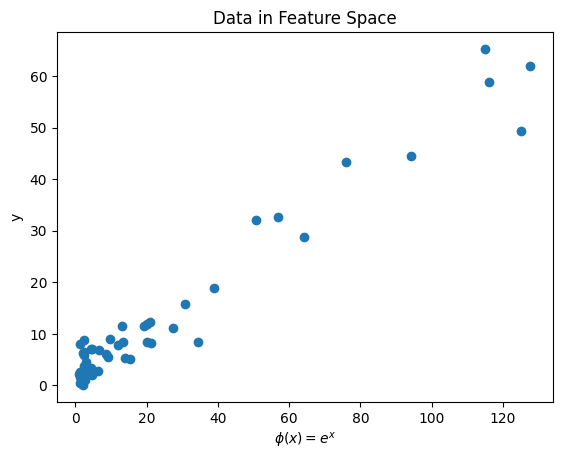

In [137]:
import numpy as np
import matplotlib.pyplot as plt

# map x to feature space: phi(x) = e^x
phi_x = np.exp(x_data)

# plot data in feature space
plt.scatter(phi_x, y_data)
plt.xlabel(r"$\phi(x) = e^x$")
plt.ylabel("y")
plt.title("Data in Feature Space")

plt.show()

# part d

In [138]:
# If your model includes a bias term, you must use an augmented design matrix (add a column of ones).
# this model equation doesn't include a bias term, so we don't need to add a column of ones to the design matrix.

In [139]:
(phi_x).shape
# (50, 0) cannot be used as a design matrix for linear regression. 
# we need (50,1)

(50,)

In [140]:
type(phi_x)

pandas.Series

In [141]:
# design matrix is just phi_x, which is a 1D array of shape (n_samples,). 
# We can reshape it to be a 2D array of shape (n_samples, 1) to make it compatible with the linear regression model.
# .reshape() only works on NumPy arrays.
phi_x = phi_x.to_numpy().reshape(-1, 1)
phi_x.shape

(50, 1)

In [142]:
y_data.shape

(50,)

In [143]:
reshaped_y_data = y_data.to_numpy().reshape(-1, 1)

In [144]:
reshaped_y_data.shape

(50, 1)

In [145]:
phi_x.shape

(50, 1)

In [146]:
w = (phi_x.T @ reshaped_y_data) / (phi_x.T @ phi_x)
w

array([[0.4949682]])

# part e

In [147]:
def fitting_function2(w, x):
    return np.exp(w*x)

In [148]:
def average_square_loss2(w):
    predictions = fitting_function(w, x_data)
    return np.mean((y_data - predictions) ** 2)

In [149]:
average_square_loss2(0.5)

np.float64(15.706562786692816)

# part f

In [150]:
minimize(average_square_loss2, x0=0.5)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 15.660434658432688
        x: [ 4.950e-01]
      nit: 1
      jac: [ 7.153e-07]
 hess_inv: [[1]]
     nfev: 6
     njev: 3

In [151]:
average_square_loss2(8.441e-01)

np.float64(237.73462207383497)

# part g

In [152]:
# this function doesn't include a feature map
# however we can linearize the data in another map rather than using the feature map.

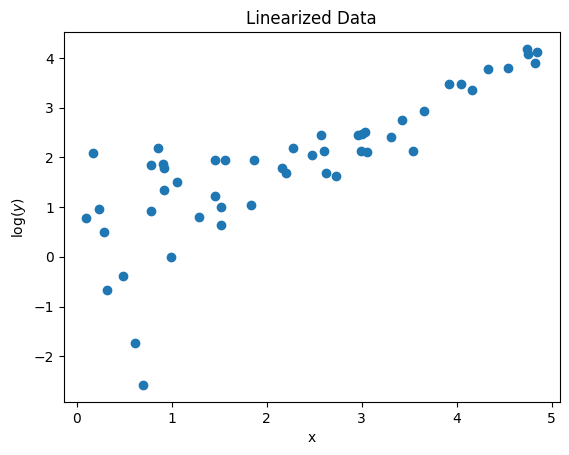

In [153]:
linearized_y = np.log(y_data)
plt.scatter(x_data, linearized_y)
plt.xlabel("x")
plt.ylabel(r"$\log(y)$")
plt.title("Linearized Data")
plt.show()

# part h

In [154]:
(x_data).shape

(50,)

In [155]:
type(x_data)

pandas.Series

In [156]:
x_data = x_data.to_numpy().reshape(-1, 1)
x_data.shape

(50, 1)

In [157]:
linearized_y.shape

(50,)

In [158]:
type(linearized_y)

pandas.Series

In [159]:
linearized_y = linearized_y.to_numpy().reshape(-1, 1)

In [160]:
type(linearized_y)

numpy.ndarray

In [161]:
w = x_data.T @ linearized_y / (x_data.T @ x_data)

In [162]:
w

array([[0.81780904]])

# part i

In [169]:
def fitting_function2(w, x):
    return np.exp(w*x)

In [172]:
predictions = fitting_function(w, x_data)
type(predictions)

numpy.ndarray

In [175]:
type(y_data)

pandas.Series

In [176]:
y_data = y_data.to_numpy()

In [177]:
def average_square_loss2(w):
    return np.mean((y_data - predictions) ** 2)

In [179]:
average_square_loss2(0.81780904)

np.float64(1143.1115128485333)